<a href="https://colab.research.google.com/github/nourandolat25/Python-Course/blob/master/student_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ReACT Hub: Data Science 101
## MISTI GTL 2019

Today we are going to learn about the basics of building out machine learning models in different ways! We will explore three concepts:
* __Overfitting and underfitting__: How do we determine whether a model is good enough? Is it too complex? Is it too simple?
* __Building predictions__: Let's build out convolutional neural networks (CNNs) to predict numbers from handwritten digits.
* __Blackboxing it__: Now, let's use a premade model!


# Exercise 1: How good is my model?
Let's try to look at the concept of **overfitting** and **underfitting** with a real life example. We're first going to *import* the necessary libraries and packages we need. We'll be using `numpy`, which is a data science library that's widely used, `matplotlib`, which is a visualization package, and a few extra things from `sklearn` which is a machine-learning library for Python. Run the cell below to import what we need!



In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score
from ipywidgets import interact

Awesome! Now, we're going to step through the actual code that's doing the work below. Let's assume that we have a function that takes in an input, $X$, and outputs another value $Y$. We can define this function as $f(X) = Y$. We don't know the exact formula for the function, but we can observe a bunch of datapoints $(X, Y)$-- basically, the inputs and outputs for a few values of the function.

We want to figure out what the function is! To do this, we're going to _fit_ a model to the function. _Fitting_ a model to the data means that we will guess what the function is and see if the curve we guess matches the datapoints that we observe. 

To simulate this, let's first create a function $f(X)$, generate a bunch of datapoints, and keep a random set of them which we will use as our observations. These are the $(X, Y)$ pairs that we can see. The default function we will be using is $f(X) = X\sin(1.5 \pi X)$. 

In [0]:
def f(X):
    return X**4 #np.sin(1.5 * np.pi * X)*X # edit this to change the underlying function 

np.random.seed(0)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x) + 500*np.random.normal(0, 1, x.shape)

Now, we are going to use *polynomial regression* to fit a curve to the datapoints we have. Recall that a polynomial is a function that takes on the form $$f(X) = a + bX + cX^2 + dX^3 + \cdots + zX^n$$
Polynomial regression is taking the datapoints and fitting a function of that form to the datapoints. If our polynomial has a lower degree (like, say, $deg = 1$), this means that the _highest_ degree-term of the polynomial is 1. For example, the degree of the polynomial $f(X) = X + 3$ is 1. This means that a degree 1 polynomial is just a line! What's the degree of the following polynomials?
$$ f(X) = X^4 + 2X $$
$$ f(X) = 5 $$

Let's see what happens when we vary the degree of the polynomial we are trying to fit to the data-- a lower degree will make the model simpler, but a higher degree will make it more complex. Use the slider to play around with the degree of the polynomial we're fitting to the data. 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.445845e-21
  overwrite_a=True).T


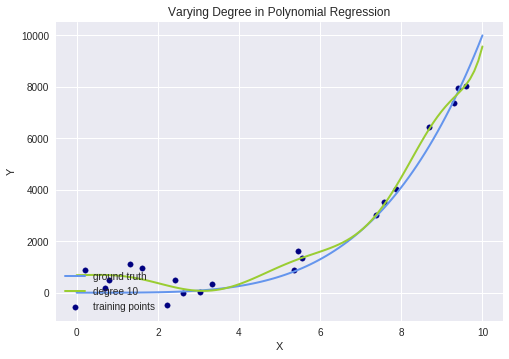

In [0]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2

def disp(deg):
    plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
    plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
    model = make_pipeline(PolynomialFeatures(deg), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[1], linewidth=lw, label="degree %d" % deg)
    plt.legend(loc='lower left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Varying Degree in Polynomial Regression')
    plt.show()

disp(10)

What happens as we move the slider around? If you have extra time, try editing the function $f(X)$ in the code above to see what happens if we try to fit a polynomial to different functions. 

# Exercise 2: Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras

Keras is a library in Python used for machine learning. We will be building a model that will use Keras for digit recognition. There are 10 digits (0 to 9) or 10 classes to predict, and each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it. Results are reported using prediction error.

After completing this tutorial, you will know:

- How to load the MNIST dataset in Keras.
- How to build a simple Convolutional Neural Network Model 
- How to evaluate the model on your own MNIST Images

Keras does provide a lot of capability for creating convolutional neural networks here. Check out more about the package here: https://keras.io/layers/convolutional/
        

## Loading the MNIST dataset
The Keras deep learning library provides a convenience method for loading the MNIST dataset.

The dataset is downloaded automatically the first time this function is called and is stored in your home directory in `~/.keras/datasets/mnist.pkl.gz` as a 15MB file. This is very handy for developing and testing deep learning models.

To demonstrate how easy it is to load the MNIST dataset, we will first write a little script to download and visualize the first 4 images in the training dataset. We will also import the classes and functions needed.

Machine Learning Datasets are usually split into training and testing sets so that you can build your model on the first dataset, and see how it performed on the second part of the dataset. This split is usually 70% of the data used for training, and 30% used for testing. 

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

What does this format of (6000,) mean?

So np.ones((6000,)) creates a one-dimensional array of size 6000, whereas np.ones((6000,1)) creates a two-dimensional array of dimension 6000×1. This is directly analogous to, say, the difference between a single number and a one-dimensional array of length 1. You can learn more about numpy arrays here: 

https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html


In [0]:
# Example of how X_train looks

X_train

In [0]:
# Example of how y_train looks

y_train

In [0]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [0]:
# More import statements to create your Convolutional Neural Network 

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Again, we always initialize the random number generator to a constant seed value for reproducibility of results.

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

## Preprocessing of the Data: Reshapping Training & Testing Sets 

Next we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [0]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

As before, it is a good idea to normalize the pixel values to the range 0 and 1 and one-hot encode the output variables.

One-hot encoding is when you encode categorical (qualitative data) variables as a binary vectors. For example, if our categories are "red", "blue", and "green", we could map these values to 001, 010, and 100. In this case, the numbers 1-10 are encoded as binary values. If we were to include their actual numerical digits, this would bias the model in favor of higher values, so 10 would somehow be better than 1, which doesn't make sense. 

This is done as follows: The label ‘3’ should be converted to a vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] for model building.

![Image](https://i.imgur.com/mtimFxh.png)

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Building the Model 

In [0]:
# Import statements to display images of Convolutional Neural Network Pipeline

from IPython.display import Image
from IPython.core.display import HTML 

Convolutional neural networks are a type of machine learning network to classify images. We apply a series of filters to detect various features in the images. Here is how a convolutional neural network looks like as an overview.

### Here is an image of a neural network as described above

![Image 1 ](https://adeshpande3.github.io/assets/Cover.png)


## Details of the Filters to Detect Various Features 

1. Convolution2D: The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which has the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].
2. MaxPooling2D: Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2. Max pooling is the application of a moving window across a 2D input space, where the maximum value within that window is the output.
3. Dropout: The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Flatten: Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
5. Fully Connected Layer: Next a fully connected layer with 128 neurons and rectifier activation function.
6. Output Layer: Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.


### Displaying what a feature map is: 

![Image 2](https://qph.fs.quoracdn.net/main-qimg-134024e4e35d7c7cbc4ccbe3a62dc8b2.webp)


### Displaying a Conv2D Function: 

![Image 3](https://cdn-images-1.medium.com/max/1600/1*fMEagiUu4QKzzHa9OUdSMg.png)


### Displaying Max Pooling Function 

![Image 4](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)


### Displaying Dropout Function:

![Image 5](https://cdn-images-1.medium.com/max/1600/1*iWQzxhVlvadk6VAJjsgXgg.png)


### Displaying Flatten Function 

![Image 6](http://www.superdatascience.com/wp-content/uploads/2018/08/CNN_Step3_Img1.png)


### Displaying Fully Connected Function (also known as Dense):

![Image 7](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/10/13170054/nn.png)



For more Information on the Diagam: 

The black circles in the picture above are neurons. Each neuron is characterized by its weight, bias and activation function. The input is fed to the input layer. The neurons do a linear transformation on the input by the weights and biases. The weight is just a slope, and a bias is a y intercept. The non linear transformation is done by the activation function. The information moves from the input layer to the hidden layers. The hidden layers would do the processing and send the final output to the output layer. This is the forward movement of information known as the forward propagation. But what if the output generated is far away from the expected value? In a neural network, we would update the weights and biases of the neurons on the basis of the error. This process is known as back-propagation. Once the entire data has gone through this process, the final weights and biases are used for predictions.


### This is what is represented by each circle in the above diagram

![Image 7](http://cs231n.github.io/assets/nn1/neuron_model.jpeg)


## To Learn More About Convolutional Neural Networks 

- If you would like to learn more about the structure of Convolutional Neural Networks: https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/

In [0]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

To understand the parameters of the function used, reference this keras guide: https://keras.io/layers/core/ 

## Evaluating the Accuracy of the Model

We evaluate the model the same way as before with the multi-layer perceptron. The CNN is fit over 5 epochs with a batch size of 200. Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classification error rate is printed.

In [0]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

## Plot Accuracy and Loss of the Model

We use the history variable returned from training the model and create two charts: 

1. A plot of accuracy on the training and validation datasets over training epochs.
2. A plot of loss on the training and validation datasets over training epochs.

Loss is often used in the training process to find the "best" parameter values for your model (e.g. weights in neural network). It is what you try to optimize in the training by updating weights. 

Accuracy is more from an applied perspective. Once you find the optimized parameters above, you use this metrics to evaluate how accurate your model's prediction is compared to the true data. 

In [0]:
# list all data in history
print(history.history.keys())

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusions

From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

## Insert the Index of Any Image and Predict Output 

In [0]:
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(X_test[image_index].shape[0], 1, 28, 28).astype('float32'))
print("Prediction: {}".format(pred.argmax()))

# Exercise 3: Object Recognition using Convolutional Neural Networks in Python with Keras

## Loading the CIFAR-10 Dataset 

In [0]:
# TODO: Import thhe CIFAR-10 Dataset Instead. 

#Documentation can be found here: https://keras.io/datasets/ 

In [0]:
# TODO: Replace this comment by copying the code too plot the images as you did before! 

In [0]:
# TODO: Experiment with the parameters with the model. Details belopw

'''''
1. Change the number of epochs to be much lower. Do you see an increase or decrease in the accuracy of the model?
2. Try Changing the Parameters of the model in the baseline_model_cifar function (Example: Adding another dropout layer, Dense layer, Conv2d)

Note: You can also change the loss parameter as well as the optimizer parameter when you compile you model, as well 
as the activation function of your parameter. 

Building better machine learning models is all about tuning these parameters and finding out what works best! 

You can find out more about parameter tuning for CNNs here: 
https://towardsdatascience.com/a-walkthrough-of-convolutional-neural-network-7f474f91d7bd 

'''''

def baseline_model_cifar():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
# build the model
model = baseline_model_cifar()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

# Exercise 4: Detect Faces using Microsoft API 

We first need to input the following information to connect with the API. It's for __authentication__ purposes: Microsoft needs to know we're a trusted source before letting us use their products.

In [0]:
subscription_key = '2fb22f3779d94a00a5079974963f6702'
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

We also need to give an input image for Microsoft to run it's model on! Check out the link here: this will be our first example. https://how-old.net/Images/faces2/main007.jpg

In [0]:
image_url = 'https://www.how-old.net/Images/faces2/main007.jpg'

The next few lines of code call into the Face API to detect the faces in the image. In this instance, the image is specified via a publically visible URL. You can also pass an image directly as part of the request body. For more information, see the [API reference](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236). 

In [0]:
import requests
from IPython.display import HTML

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
print(response)
faces = response.json()
HTML("<font size=5>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

Finally, the face information can be overlaid of the original image using the `matplotlib` library in Python.

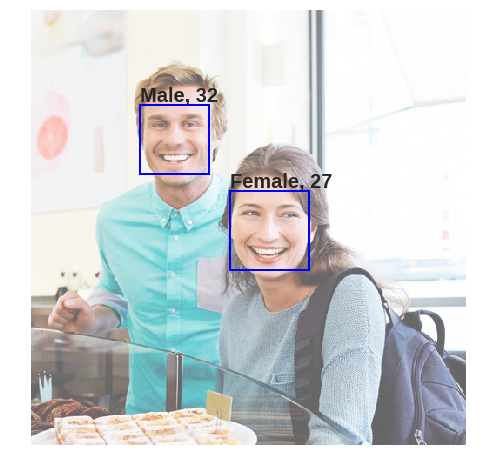

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

Now, let's wrap this in a function so we can call it easily on a variety of images! 

In [0]:
def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=16, weight="bold", va="bottom")
    plt.axis("off")

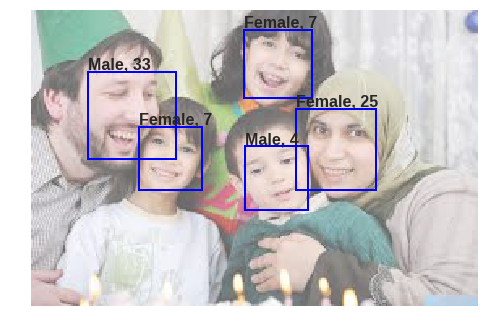

In [0]:
annotate_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcfvZp5SR_wD7RxUGCGNVMrw-k-E1rREbH1Xc-XZ4H_vjPvtMx3A")


In [0]:
annotate_image("https://how-old.net/Images/faces2/main001.jpg")